In [2]:
%pip install pandas-datareader
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 9.5 MB 40.2 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23910 sha256=24071ad9162775e49ebac0a78200c607630a2a9f80e1a182dcdd63acf80a400f
  Stored in directory: /home/azureuser/.cache/pip/wheels/8d/70/7b/987abb0c1e8a5b73008bdf47cbecd9df6dd145fa5f1ac27872
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=70bc3199be50077e0030aa2d8a73ef2f8d6eadd65e05e3035e4f88fc517a34bd
  Stored in directory: /home/azureuser/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will 

In [3]:
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

# Access to the Federal Reserve bank of St Louis' FRED

The list of available data, along with tickers, can be found on https://fred.stlouisfed.org/ . The next example downloads the 10-year constant-maturity yields
on U.S. government bonds.


In [6]:
pdr.get_data_fred('GS10')

,GS10
DATE,
2016-11-01,2.14
2016-12-01,2.49
2017-01-01,2.43
2017-02-01,2.42
2017-03-01,2.48
2017-04-01,2.30
2017-05-01,2.30
2017-06-01,2.19
2017-07-01,2.32


# Historical price and volume data with Stooq

Stooq is a Polish website which contains downloads of EOD data for a lot of indices which are missing from Yahoo Finance for different indices check out
https://stooq.com/t/?i=510

In [11]:

start ='1999'
end = datetime(2021,10,8)
#BEL-20 (^BEL20) - for symbols to use view stooq website - https://stooq.com/t/?i=510

bel20 = web.DataReader('^BEL20','stooq',start=start,end=end) 
bel20.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-08,4149.97,4163.64,4145.07,4145.07,NaN
2021-10-07,4136.55,4161.32,4127.82,4152.40,6640709.0
2021-10-06,4115.04,4115.04,4063.04,4100.05,7230593.0
2021-10-05,4121.62,4145.41,4119.86,4145.06,5323814.0
2021-10-04,4123.88,4143.51,4113.89,4116.92,4962406.0


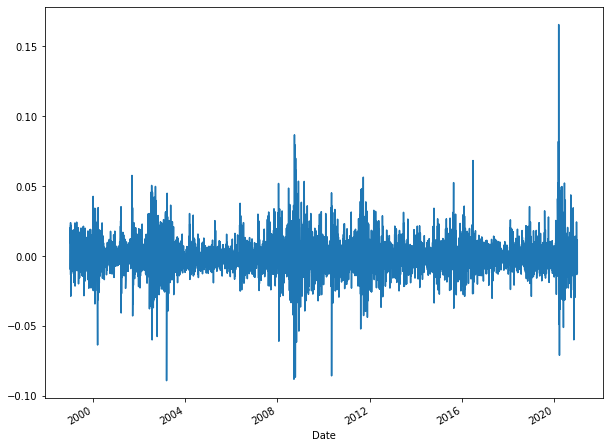

In [20]:
bel20['DailyChange']=bel20['Close'].pct_change(periods=1).dropna()

bel20.head()

plt.figure(figsize=(10,8))
bel20['DailyChange'].loc['2021-01-01':].plot()
plt.show()

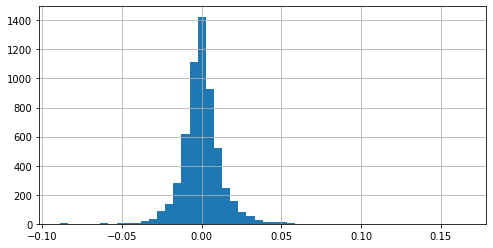

In [21]:
#Plot a histogram to see the distribution of the returns
dailychanges.hist(bins=50,figsize=(8,4))

# Working with yfinance
yFinance is an open source library which replaces the deprecated Yahoo Finance library, the source code
can be found on https://github.com/ranaroussi/yfinance but it is not supported by Yahoo.
All documentation can be found on a single page https://pypi.org/project/yfinance/ . It has stability issues but these mostly get fixed quite rapidly

In [4]:
aapl = yf.Ticker("AAPL")
aapl_historical = aapl.history(start="2020-06-02",end="2021-09-23",interval="1d")
aapl_historical.head(5)

- AAPL: auto_adjust failed with cannot import name 'roperator'


ImportError: cannot import name 'roperator'